In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from lib.util.helper import query_table, weekday_time_series
import seaborn as sns
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf

In [10]:
#df_1T = query_table(table='entsorgung_30T')
ent_week = weekday_time_series(sensor_id='entsorgung_10T')

ent_week['kw'] = round(ent_week['kw'], 2)
ent_week['kw'] = ent_week['kw'].apply(lambda x: 0.0 if x == -0.0 else x)
ent_week['log_kw'] = np.log(ent_week['kw'])

In [11]:
px.line(
    x=ent_week.index, y=ent_week.kw, 
    title='Entsorgung',
    labels={
        'x': 'Time',
        'y': 'kW'
    })

In [12]:
ent_week.shape

(720, 9)

In [14]:
time_int_range = np.arange(0, 720*10, 10)
ent_week['t'] = time_int_range

ent_week['t_scaled'] = (ent_week['t'] - ent_week['t'].min()) / (ent_week['t'].max() - ent_week['t'].min())

In [15]:
px.line(
    x=ent_week['t_scaled'], y=ent_week.kw, 
    title='Entsorgung',
    labels={
        'x': 'Time',
        'y': 'kW'
    })

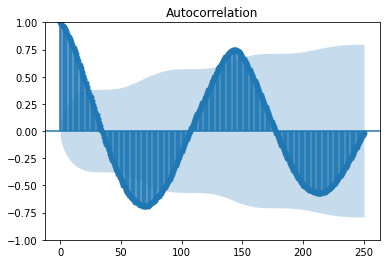

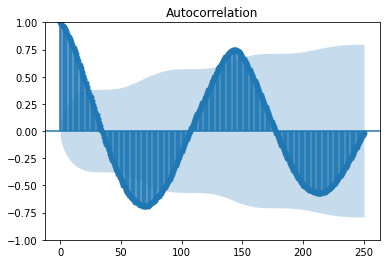

In [17]:
plot_acf(ent_week.kw.values.squeeze(), lags=250)